In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


28996


<function matplotlib.pyplot.show(*args, **kw)>

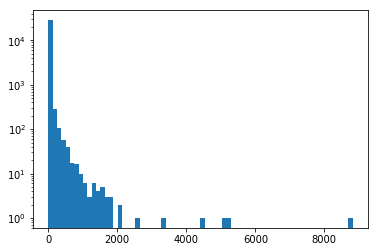

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

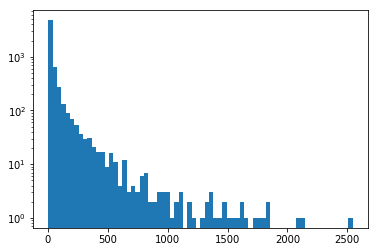

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 3000]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [6]:
data['m'] = data['modded1_stemmed'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
pd.Series(' '.join(data['m']).split()).value_counts()
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,sure tune watch donald trump late night...,sure tune watch donald late night david letter...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump appear view tomorrow morn ...,donald appear view tomorrow morn discuss celeb...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,afraid uniqu like afraid best self dona...,afraid uniqu like afraid best self donald j
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,latest updat bret michael he make everi...,latest updat bret michael he make everi effort...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china drive price gold order eas pressu...,china drive price gold order pressur iranian s...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im big fan new realdonaldt...,im big fan new tie sell
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like bush kill...,like bush kill kid iraq invad wrong countri re...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosbi help realdonaldtrump depress ke...,help depress keep
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt sad way putin toy obama regard sn...,isnt sad way putin toy obama regard snowden lo...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzot realdonaldtrump your one voic ...,your one voic reason crumbl nation america nee...


In [7]:
sentences = data[data["year"] == 2016]["m"].tolist()
#sentences = data[data["year"] == 2016]["modded1"].tolist()
#sentences = data["modded1_stemmed"].tolist()
sentences

['foxnew live member famili pm ring new year togeth make america',
 'happi new year',
 'happi new year famili support',
 'hillari said war explan lie benghazi allow wh vote potu',
 'cnn theyr spend million your still go win go donald',
 'well year offici begun mani stop plan work hard win turn countri around',
 'love u famili god bless',
 'jodil792 stand spread presid 2016 wake sleep pray',
 'im one biggest fan mr cant wait make america never forget support',
 'huckabe good need get behind agre',
 'go mississippi tomorrow night hear crowd go massiv look forward',
 'never interest polit want get polit scienc degre trump2016',
 'person hillari clinton least want run far largest voter turnout ever swamp',
 'much name 2015 man year inde honor',
 'votetrump2016 togeth makeamericagreatagain support',
 'massiv crowd expect mississippi tomorrow night look forward 2015 photo',
 'jebbush sad case total embarrass famili announc continu spend hit ad',
 'jebbush low energi stiff focu special intere

In [8]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnew', 'live', 'member', 'famili', 'pm', 'ring', 'new', 'year', 'togeth', 'make', 'america'], tags=['0']),
 TaggedDocument(words=['happi', 'new', 'year'], tags=['1']),
 TaggedDocument(words=['happi', 'new', 'year', 'famili', 'support'], tags=['2']),
 TaggedDocument(words=['hillari', 'said', 'war', 'explan', 'lie', 'benghazi', 'allow', 'wh', 'vote', 'potu'], tags=['3']),
 TaggedDocument(words=['cnn', 'theyr', 'spend', 'million', 'your', 'still', 'go', 'win', 'go', 'donald'], tags=['4']),
 TaggedDocument(words=['well', 'year', 'offici', 'begun', 'mani', 'stop', 'plan', 'work', 'hard', 'win', 'turn', 'countri', 'around'], tags=['5']),
 TaggedDocument(words=['love', 'u', 'famili', 'god', 'bless'], tags=['6']),
 TaggedDocument(words=['jodil792', 'stand', 'spread', 'presid', '2016', 'wake', 'sleep', 'pray'], tags=['7']),
 TaggedDocument(words=['im', 'one', 'biggest', 'fan', 'mr', 'cant', 'wait', 'make', 'america', 'never', 'forget', 'support'], tags=['8']),
 TaggedD

In [9]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)


E:\Anaconda\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [10]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha



iteration 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [ ]:
test_data = word_tokenize("mexico wall year great country")

v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar("1")
print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])



In [ ]:
test_data = word_tokenize("mexico")
model.wv.most_similar(test_data)

In [11]:
from sklearn.metrics import silhouette_score

start_alpha=0.01
infer_epoch=1000

X=[]
for d in sentences:
    X.append( model.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )

# BIRCH

In [ ]:
scores = []
for k in range(2,10):
    print(k)
    from sklearn.cluster import Birch

    brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
    brc.fit(X)

    clusters = brc.predict(X)

    labels = brc.labels_

    #print ("Clusters: ")
    #print (clusters)
    m = silhouette_score(X, labels, metric="euclidean")
    scores.append(m)
    print ("Silhouette_score: ")
    print (k, m)

#silhouette
#0.140 noStop_modded   5 cluster
#0.169 stemmed (no counted)
#0.118 temmed_counted

#silhouette with new preprocessing
#0.135 k = 2/4/5 stemmed
#0.284 k = 2, 1.55 k = 3 not stemmed 

#silhouette su dataset intero non ha senso 


from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
brc.fit(X)

clusters = brc.predict(X)

labels = brc.labels_

#print ("Clusters: ")
#print (clusters)
m = silhouette_score(X, labels, metric="euclidean")
scores.append(m)
print ("Silhouette_score: ")
print (k, m)

# KMEANS

In [12]:
#try some clustering 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [13]:
true_k = 5
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
kmeans.fit(X)
print(kmeans.inertia_)

d = silhouette_score(X, kmeans.labels_,metric='cosine')
print(d)

530126.3100696612
0.12749211


# nltk kmeans

In [48]:
from nltk.cluster import KMeansClusterer
import nltk

NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)
#0.229 con cluster che sembrano decent, problema è che guardi solo parole più frequenti 4
#0.230 " " " " 5 
#0.242 " " " " 6
#0.227 cluster parole frequenti sembrano meglio 7 
#0.226 cluster " " " " " anche se alcuni cluster sono "doppi?"8
#0.229 """""""""""""" 9
#0.237 """""""""" 10

0.2374109


In [49]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,foxnew live member famili pm ring new year tog...,5
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,happi new year,2
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,happi new year famili support,9
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,hillari said war explan lie benghazi allow wh ...,2
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,cnn theyr spend million your still go win go d...,6
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,well year offici begun mani stop plan work har...,2
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,love u famili god bless,7
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,jodil792 stand spread presid 2016 wake sleep pray,4
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,im one biggest fan mr cant wait make america n...,6
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,huckabe good need get behind agre,5


In [50]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    words = pd.Series(' '.join(c['m']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 521
Cluster 1 dimension 628
Cluster 2 dimension 587
Cluster 3 dimension 297
Cluster 4 dimension 301
Cluster 5 dimension 436
Cluster 6 dimension 756
Cluster 7 dimension 246
Cluster 8 dimension 248
Cluster 9 dimension 189


In [52]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 hillari    141
crook       84
clinton     65
watch       49
job         43
show        41
night       33
go          33
tonight     32
bad         32
dtype: int64
cluster  1 hillari    62
clinton    61
cruz       61
ted        49
get        44
us         42
win        39
go         38
debat      36
rt         33
dtype: int64
cluster  2 hillari     130
clinton      75
crook        72
peopl        66
new          59
support      54
watch        42
hampshir     41
rt           31
poll         29
dtype: int64
cluster  3 make         70
america      70
peopl        31
hillari      29
support      25
get          23
cruz         21
crook        21
trump2016    20
look         20
dtype: int64
cluster  4 trump2016                238
makeamericagreatagain     82
america                   31
join                      27
new                       21
poll                      18
tomorrow                  15
iowa                      13
trumppence16              12
make                  

# DBSCAN FA CACARE

In [20]:
ep = [x for x in np.arange(0.05, 0.12,0.002)]

#sembra ci sia l'elbow attorno a 0.11
#ep = [0.102,0.104,0.106,0.108,0.11,0.112,0.114,0.116]

#il migliore è eps =0.108 per questo 

for x in ep:
    clustering = DBSCAN(eps=x, min_samples=3,metric="cosine").fit(X)
    labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='cosine')
    print(x,d)

#data1 = data[data["year"] == 2016]
#data1["labels"] = labels
#data1

Estimated number of clusters: 14
0.05 0.16243449
Estimated number of clusters: 13
0.052000000000000005 0.16776459
Estimated number of clusters: 11
0.054000000000000006 0.21030244
Estimated number of clusters: 10
0.05600000000000001 0.21621478
Estimated number of clusters: 10
0.05800000000000001 0.21592411
Estimated number of clusters: 9
0.06000000000000001 0.21993424
Estimated number of clusters: 8
0.06200000000000001 0.26587152
Estimated number of clusters: 8
0.06400000000000002 0.2664763
Estimated number of clusters: 6
0.06600000000000002 0.31875423
Estimated number of clusters: 6
0.06800000000000002 0.31970763
Estimated number of clusters: 6
0.07000000000000002 0.3198277
Estimated number of clusters: 6
0.07200000000000002 0.321175
Estimated number of clusters: 6
0.07400000000000002 0.3216834
Estimated number of clusters: 6
0.07600000000000003 0.32587415
Estimated number of clusters: 6
0.07800000000000003 0.32631585
Estimated number of clusters: 6
0.08000000000000003 0.32652134
Estim

In [25]:
clustering = DBSCAN(eps=0.05, min_samples=3,metric="cosine").fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
d = silhouette_score(X, labels,metric='cosine')
print(d)

Estimated number of clusters: 14
0.16243449


In [26]:
datadb = data[data["year"] == 2016]
datadb["labels"] = labels
datadb

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,foxnew live member famili pm ring new year tog...,0
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,happi new year,0
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,happi new year famili support,1
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,hillari said war explan lie benghazi allow wh ...,0
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,cnn theyr spend million your still go win go d...,0
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,well year offici begun mani stop plan work har...,0
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,love u famili god bless,0
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,jodil792 stand spread presid 2016 wake sleep pray,0
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,im one biggest fan mr cant wait make america n...,0
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,huckabe good need get behind agre,0


In [27]:
for cluster in range(0,n_clusters_):
    c = datadb[datadb["labels"] == cluster]
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    print("Cluster " + str(cluster), len(c))
    print(words)

Cluster 0 3853
thank                    558
great                    537
hillary                  459
trump                    395
amp                      352
realdonaldtrump          341
trump2016                338
clinton                  274
people                   272
makeamericagreatagain    265
america                  244
new                      229
crooked                  227
make                     203
rt                       187
get                      185
cruz                     183
us                       159
vote                     159
big                      157
join                     153
president                147
today                    137
would                    133
never                    129
time                     128
one                      126
going                    126
like                     125
ted                      125
                        ... 
forensic                   1
crisisthe                  1
soul                       1

# TEst

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)
distances

In [ ]:
distances.mean()

In [ ]:
c = []
for el in distances:
    l = len(el)- 1
    c.append(el[l])
c.sort(reverse=True)
c

In [ ]:
import matplotlib.pyplot as plt

l = [x for x in range(0,len(c))]
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(l, c)
plt.show()


In [ ]:
n = np.linspace(10,12,10)

for i in n:
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)


In [ ]:

for i in range(9,14):
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)
